# 2 - Adaline and Madaline

## 2.1 - Adaline for breast cancer classification

##### 2.1.1 

##### 2.1.2 - Import required libraries and dowlonad the dataset 

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="Conversion of an array with ndim > 0 to a scalar is deprecated")


data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

##### Divide the dataset into training and testing datasets with a ration of 7 to 3

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)
df_train = pd.DataFrame(X_train, columns=feature_names)
df_test = pd.DataFrame(X_test, columns=feature_names)

##### Display the shape of the data

In [3]:
print("Full shape:", X.shape, "Labels shape:", y.shape)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("\nClass distribution (full):\n", pd.Series(y).value_counts().sort_index())
print("\nClass distribution (train):\n", pd.Series(y_train).value_counts().sort_index())
print("\nClass distribution (test):\n", pd.Series(y_test).value_counts().sort_index())

Full shape: (569, 30) Labels shape: (569,)
Train shape: (398, 30) Test shape: (171, 30)

Class distribution (full):
 0    212
1    357
Name: count, dtype: int64

Class distribution (train):
 0    148
1    250
Name: count, dtype: int64

Class distribution (test):
 0     64
1    107
Name: count, dtype: int64


##### Normalize data and report dataset statistics

In [4]:
print("\nTraining data statistics (before normalization):")
print(df_train.describe().T)




Training data statistics (before normalization):
                         count        mean         std         min  \
mean radius              398.0   14.104367    3.622681    7.691000   
mean texture             398.0   19.219322    4.271260    9.710000   
mean perimeter           398.0   91.810477   24.976230   47.920000   
mean area                398.0  654.679397  363.900604  170.400000   
mean smoothness          398.0    0.096044    0.013946    0.052630   
mean compactness         398.0    0.104132    0.053261    0.019380   
mean concavity           398.0    0.088673    0.078367    0.000000   
mean concave points      398.0    0.049033    0.039399    0.000000   
mean symmetry            398.0    0.180104    0.027006    0.106000   
mean fractal dimension   398.0    0.062739    0.007086    0.049960   
radius error             398.0    0.401333    0.287800    0.111500   
texture error            398.0    1.211003    0.543530    0.360200   
perimeter error          398.0    2.8505

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
df_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

print("\nTraining data statistics (after StandardScaler):")
print(df_train_scaled.describe().T)


Training data statistics (after StandardScaler):
                         count          mean       std       min       25%  \
mean radius              398.0 -3.338480e-15  1.001259 -1.772565 -0.706682   
mean texture             398.0 -6.739444e-16  1.001259 -2.229153 -0.714229   
mean perimeter           398.0  6.045415e-15  1.001259 -1.759502 -0.714095   
mean area                398.0  1.740651e-16  1.001259 -1.332476 -0.676390   
mean smoothness          398.0 -3.628588e-15  1.001259 -3.117028 -0.752393   
mean compactness         398.0  4.284680e-16  1.001259 -1.593253 -0.765528   
mean concavity           398.0  1.539807e-16  1.001259 -1.132924 -0.761735   
mean concave points      398.0  3.057298e-16  1.001259 -1.246069 -0.735204   
mean symmetry            398.0 -6.114595e-16  1.001259 -2.747421 -0.677684   
mean fractal dimension   398.0  2.499397e-15  1.001259 -1.805583 -0.714094   
radius error             398.0  8.212303e-16  1.001259 -1.008329 -0.614941   
texture error 

##### 2.1.3 - Implementing Adaline from scratch

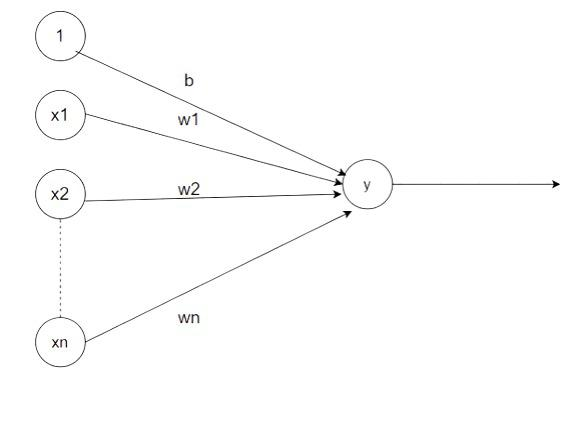

In [6]:
class Adaline:
    def __init__(self, lr, stop, n_iter, Input):
        self.lr = lr
        self.stop = stop
        self.n_iter = n_iter
        np.random.seed(1)
        self.weights = np.random.random(len(Input[0]))
        self.bias = np.random.random(1)
        
    def train_NN(self, Input, Target):
        weights = self.weights
        bias = self.bias
        MSE = self.stop + 1
        stop = self.stop
        epoch_counter = 1
        training_MSEs = []
        training_accuracies = []
        while (MSE > stop and epoch_counter <= self.n_iter):
            MSE = 0
            print(f"Epoch {epoch_counter}/{self.n_iter} : ")
            for i in range(len(Input)):
                net = 0
                for j in range(len(weights)):
                    net += weights[j] * Input[i][j]
                net += bias
                for j in range(len(weights)):
                    weights[j] = weights[j] + self.lr * float((Target[i] - net) * Input[i][j])
                bias = bias + self.lr * (Target[i] - net)
                MSE += ((Target[i] - net)**2)/len(Input[0])
                
            epoch_pred, _ = self.predict(Input)
            accuracy = metrics.accuracy_score(Target, epoch_pred)    
            training_accuracies.append(accuracy)
            training_MSEs.append(MSE)
            print("Epoch MSE : ", MSE)
            print("Epoch accuracy : ", accuracy)
            epoch_counter += 1
        return training_MSEs, training_accuracies
    
    def predict(self, Input):
        weights = self.weights
        bias = self.bias
        predictions = []
        scores = []
        for i in range(len(Input)):
            pred = 0
            for j in range(len(weights)):
                pred += weights[j]*Input[i][j]
            pred += bias
            scores.append(pred)
            if pred >= 0:
                predictions.append(1)
            else:
                predictions.append(0)
        return predictions, scores


##### Adaline with learning rate = 0.001

In [7]:
Adaline_NN_1 = Adaline(lr=0.001, n_iter=50, stop=0.01, Input=X_train_scaled)
errors_1, acc_1 = Adaline_NN_1.train_NN(X_train_scaled, y_train)
y_pred_1, y_scores_1 = Adaline_NN_1.predict(X_test_scaled)


Epoch 1/50 : 
Epoch MSE :  [115.72385565]
Epoch accuracy :  0.5954773869346733
Epoch 2/50 : 
Epoch MSE :  [8.89712879]
Epoch accuracy :  0.7035175879396985
Epoch 3/50 : 
Epoch MSE :  [4.37343968]
Epoch accuracy :  0.8065326633165829
Epoch 4/50 : 
Epoch MSE :  [2.9439881]
Epoch accuracy :  0.8291457286432161
Epoch 5/50 : 
Epoch MSE :  [2.33787741]
Epoch accuracy :  0.8366834170854272
Epoch 6/50 : 
Epoch MSE :  [2.01075124]
Epoch accuracy :  0.8492462311557789
Epoch 7/50 : 
Epoch MSE :  [1.80368922]
Epoch accuracy :  0.8592964824120602
Epoch 8/50 : 
Epoch MSE :  [1.65884333]
Epoch accuracy :  0.871859296482412
Epoch 9/50 : 
Epoch MSE :  [1.55059679]
Epoch accuracy :  0.8793969849246231
Epoch 10/50 : 
Epoch MSE :  [1.46588611]
Epoch accuracy :  0.8819095477386935
Epoch 11/50 : 
Epoch MSE :  [1.39736367]
Epoch accuracy :  0.8844221105527639
Epoch 12/50 : 
Epoch MSE :  [1.34057539]
Epoch accuracy :  0.8944723618090452
Epoch 13/50 : 
Epoch MSE :  [1.29264553]
Epoch accuracy :  0.896984924623

##### Adaline with learning rate = 0.005

In [8]:
Adaline_NN_2 = Adaline(lr=0.005, n_iter=50, stop=0.01, Input=X_train_scaled)
errors_2, acc_2 = Adaline_NN_2.train_NN(X_train_scaled, y_train)
y_pred_2, y_scores_2 = Adaline_NN_2.predict(X_test_scaled)

Epoch 1/50 : 
Epoch MSE :  [29.72808881]
Epoch accuracy :  0.7964824120603015
Epoch 2/50 : 
Epoch MSE :  [2.08363103]
Epoch accuracy :  0.8542713567839196
Epoch 3/50 : 
Epoch MSE :  [1.49748977]
Epoch accuracy :  0.8844221105527639
Epoch 4/50 : 
Epoch MSE :  [1.26639542]
Epoch accuracy :  0.9095477386934674
Epoch 5/50 : 
Epoch MSE :  [1.14465984]
Epoch accuracy :  0.9221105527638191
Epoch 6/50 : 
Epoch MSE :  [1.06855253]
Epoch accuracy :  0.9321608040201005
Epoch 7/50 : 
Epoch MSE :  [1.01521643]
Epoch accuracy :  0.9371859296482412
Epoch 8/50 : 
Epoch MSE :  [0.9750713]
Epoch accuracy :  0.9447236180904522
Epoch 9/50 : 
Epoch MSE :  [0.94351817]
Epoch accuracy :  0.9472361809045227
Epoch 10/50 : 
Epoch MSE :  [0.91803963]
Epoch accuracy :  0.9472361809045227
Epoch 11/50 : 
Epoch MSE :  [0.89709104]
Epoch accuracy :  0.9522613065326633
Epoch 12/50 : 
Epoch MSE :  [0.87963822]
Epoch accuracy :  0.9597989949748744
Epoch 13/50 : 
Epoch MSE :  [0.8649454]
Epoch accuracy :  0.9623115577889

##### Adaline with learning rate = 0.02

In [9]:
Adaline_NN_3 = Adaline(lr=0.02, n_iter=50, stop=0.01, Input=X_train_scaled)
errors_3, acc_3 = Adaline_NN_3.train_NN(X_train_scaled, y_train)
y_pred_3, y_scores_3 = Adaline_NN_3.predict(X_test_scaled)

Epoch 1/50 : 
Epoch MSE :  [12.74651327]
Epoch accuracy :  0.8316582914572864
Epoch 2/50 : 
Epoch MSE :  [1.90724179]
Epoch accuracy :  0.8768844221105527
Epoch 3/50 : 
Epoch MSE :  [1.50069621]
Epoch accuracy :  0.9170854271356784
Epoch 4/50 : 
Epoch MSE :  [1.29453024]
Epoch accuracy :  0.9396984924623115
Epoch 5/50 : 
Epoch MSE :  [1.18051267]
Epoch accuracy :  0.9472361809045227
Epoch 6/50 : 
Epoch MSE :  [1.11402031]
Epoch accuracy :  0.9472361809045227
Epoch 7/50 : 
Epoch MSE :  [1.07311808]
Epoch accuracy :  0.9472361809045227
Epoch 8/50 : 
Epoch MSE :  [1.0465032]
Epoch accuracy :  0.9472361809045227
Epoch 9/50 : 
Epoch MSE :  [1.02828067]
Epoch accuracy :  0.949748743718593
Epoch 10/50 : 
Epoch MSE :  [1.0153324]
Epoch accuracy :  0.949748743718593
Epoch 11/50 : 
Epoch MSE :  [1.00593147]
Epoch accuracy :  0.949748743718593
Epoch 12/50 : 
Epoch MSE :  [0.99903508]
Epoch accuracy :  0.949748743718593
Epoch 13/50 : 
Epoch MSE :  [0.99394626]
Epoch accuracy :  0.9522613065326633


##### Choose model with least training error

In [10]:
final_errors = [errors_1[-1], errors_2[-1], errors_3[-1]]
final_accs = [acc_1[-1], acc_2[-1], acc_3[-1]]

predictions = [y_pred_1, y_pred_2, y_pred_3]
scores = [y_scores_1, y_scores_2, y_scores_3]
models = [Adaline_NN_1, Adaline_NN_2, Adaline_NN_3]
best_idx = np.argmax(final_accs)
best_predictions = predictions[best_idx]
best_scores = scores[best_idx]
print(f"Best model is model #{best_idx+1} with training accuracy {final_accs[best_idx]}")

Best model is model #2 with training accuracy 0.9723618090452262


##### Accuracy, Precision, Recall, F1

In [ ]:
accuracy = metrics.accuracy_score(y_test, best_predictions)
precision = metrics.precision_score(y_test, best_predictions)
recall = metrics.recall_score(y_test, best_predictions)
f1 = metrics.f1_score(y_test, best_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.96
Precision: 0.95
Recall: 0.98
F1 Score: 0.97


##### Confusion Matrix

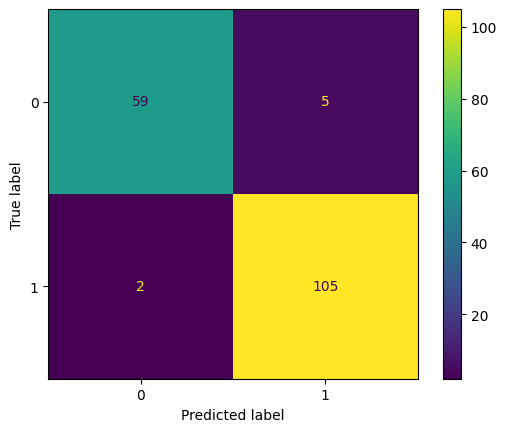

In [12]:
confusion_matrix = metrics.confusion_matrix(y_test, best_predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()


##### ROC/AUC

ROC AUC:  0.9884637850467289


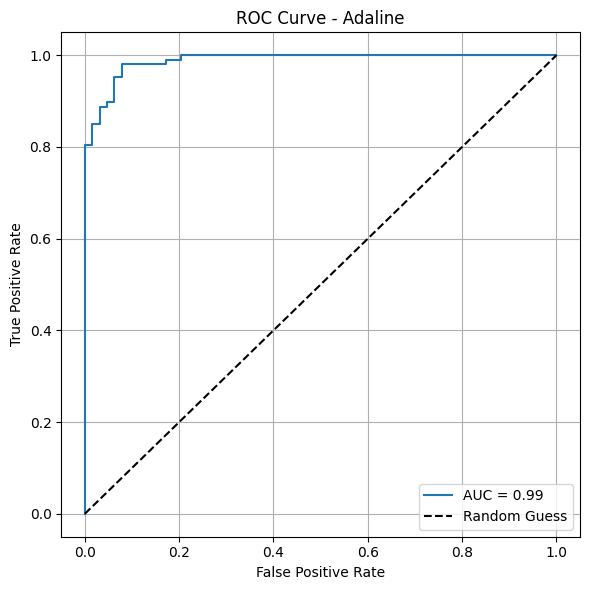

In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, best_scores)
auc = metrics.roc_auc_score(y_test, best_scores)

print(f"ROC AUC: ", auc)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - Adaline")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


##### PCA

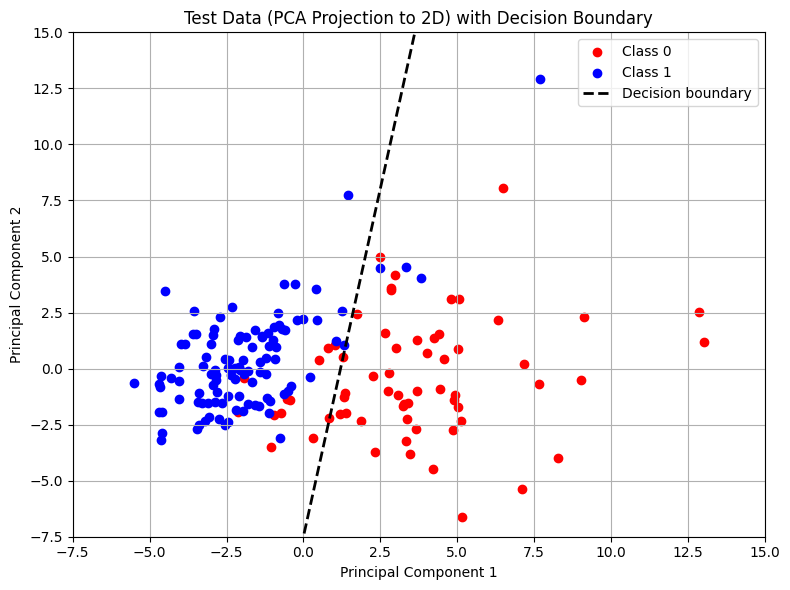

In [14]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1],
    color='red', alpha=1, label='Class 0'
)
plt.scatter(
    X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1],
    color='blue', alpha=1, label='Class 1'
)

best_model = models[best_idx]
w_pca = pca.components_ @ best_model.weights
w = np.array(w_pca)
b = best_model.bias

x_vals = np.linspace(X_test_pca[:, 0].min(), X_test_pca[:, 0].max(), 200)

if w[1] != 0:
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'k--', linewidth=2, label='Decision boundary')
else:
    x_boundary = -b / w[0]
    plt.axvline(x_boundary, color='k', linestyle='--', linewidth=2, label='Decision boundary')

plt.title("Test Data (PCA Projection to 2D) with Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.xlim(-7.5, 15)
plt.ylim(-7.5, 15)
plt.tight_layout()
plt.show()


##### Error and Accuracy per Epoch

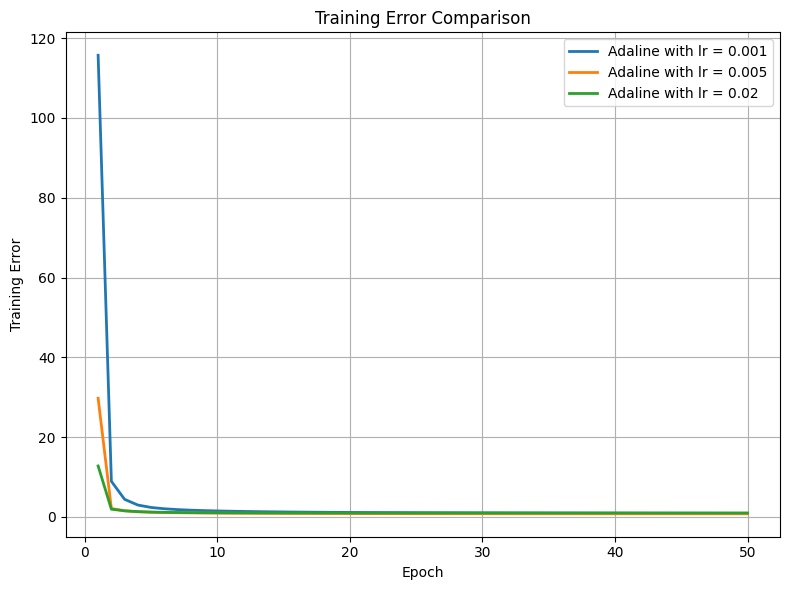

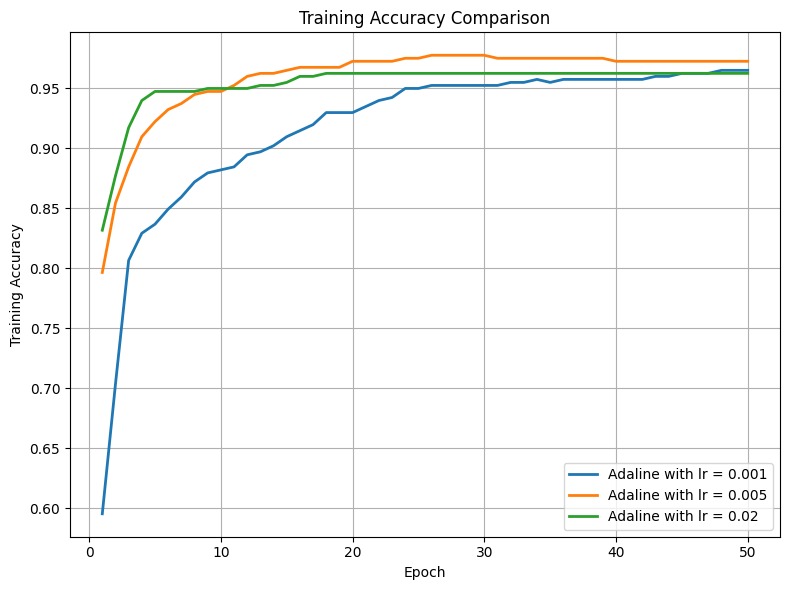

In [15]:
import matplotlib.pyplot as plt

# Example: x-axis as epochs or iterations
epochs = range(1, len(errors_1) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, errors_1, label='Adaline with lr = 0.001', linewidth=2)
plt.plot(epochs, errors_2, label='Adaline with lr = 0.005', linewidth=2)
plt.plot(epochs, errors_3, label='Adaline with lr = 0.02', linewidth=2)

plt.title('Training Error Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt

# Example: x-axis as epochs or iterations
epochs = range(1, len(acc_1) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, acc_1, label='Adaline with lr = 0.001', linewidth=2)
plt.plot(epochs, acc_2, label='Adaline with lr = 0.005', linewidth=2)
plt.plot(epochs, acc_3, label='Adaline with lr = 0.02', linewidth=2)

plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



##### LDA and Logistic Regression

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy}%")

Accuracy: 0.935672514619883%


In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
accuracy_lda = metrics.accuracy_score(y_test, y_pred_lda)
print(f"LDA Accuracy: {accuracy_lda*100:.2f}%")

LDA Accuracy: 95.32%


## 2.2 Madaline on Circles and Moons

### 2.2.1 Implement Madaline

In [89]:
import numpy as np
from sklearn import metrics

def sign(z):
    return 1 if z >= 0 else -1

class Madaline:

    def __init__(self, lr, stop, n_iter, m, Input, l2_penalty):
        self.lr = lr
        self.stop = stop
        self.n_iter = n_iter
        self.m = m
        self.l2_penalty = l2_penalty
        np.random.seed(1)
        
        self.neurons = [Adaline(lr, stop, n_iter, Input) for _ in range(m)]
        
        self.weights = np.random.uniform(-0.5, 0.5, m)
        self.bias = np.random.uniform(-0.5, 0.5, 1)


    def predict(self, Input):
        weights = self.weights
        bias = self.bias
        predictions = []
        scores = []

        for i in range(len(Input)):
            hidden_outputs = []
            for j in range(len(self.neurons)):
                neuron = self.neurons[j]
                net_h = 0
                for k in range(len(neuron.weights)):
                    net_h += neuron.weights[k] * Input[i][k]
                net_h += neuron.bias
                if net_h >= 0:
                    hidden_outputs.append(1)
                else:
                    hidden_outputs.append(-1)

                hidden_outputs.append(sign(net_h))
            net_out = 0
            for j in range(len(weights)):
                net_out += weights[j] * hidden_outputs[j]
            net_out += bias

            scores.append(net_out)
            predictions.append(sign(net_out))
            
        return predictions, scores

    def train_NN(self, X, y):
        n_samples = len(X)
        epoch = 0
        mse_history = []
        acc_history = []

        while epoch < self.n_iter:
            preds, _ = self.predict(X)
            acc = metrics.accuracy_score(y, preds)
            acc_history.append(acc)

            mse = np.mean((y - preds)**2)
            mse_history.append(mse)

            print(f"Epoch {epoch+1}/{self.n_iter} | Accuracy: {acc:.4f} | MSE: {mse:.4f}")

            if len(mse_history) > 1  and mse_history[-1] > mse_history[-2]:
                break

            for i in range(n_samples):
                x_i = X[i]
                t_i = y[i]

                hidden_outputs = np.array([
                    sign(np.dot(neuron.weights, x_i) + neuron.bias)
                    for neuron in self.neurons
                ])
                net_out = np.dot(self.weights, hidden_outputs) + self.bias
                y_pred = sign(net_out)

                if y_pred == t_i:
                    continue

                best_j = None
                best_error_reduction = 0
                original_error = (t_i - net_out) ** 2

                for j in range(self.m):
                    flipped = hidden_outputs.copy()
                    flipped[j] *= -1
                    new_out = np.dot(self.weights, flipped) + self.bias
                    new_error = (t_i - new_out) ** 2
                    error_reduction = original_error - new_error

                    if error_reduction > best_error_reduction:
                        best_error_reduction = error_reduction
                        best_j = j

                if best_j is not None:
                    neuron = self.neurons[best_j]
                    net_h = np.dot(neuron.weights, x_i) + neuron.bias
                    desired_output = -np.sign(net_h)  # flip its sign

                    # Standard Adaline-style weight update
                    delta_w = self.lr * (desired_output - net_h) * x_i
                    delta_b = self.lr * (desired_output - net_h)

                    # Add L2 regularization penalty (weight decay)
                    neuron.weights = (1 - self.lr * self.l2_penalty) * neuron.weights + delta_w
                    neuron.bias += delta_b  # usually bias is not regularized

            # Also apply L2 decay to the output layer weights
            self.weights = (1 - self.lr * self.l2_penalty) * self.weights

            epoch += 1

        return mse_history, acc_history


### 2.2.2 Data and learning configuration

In [90]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
Xmoons, ymoons = make_moons(n_samples=600, noise=0.25, random_state=0)
Xcircles, ycircles = make_circles(n_samples=600, noise=0.1, random_state=0)

Xmoons_train, Xmoons_test, ymoons_train, ymoons_test = train_test_split(
    Xmoons, ymoons, test_size=0.3, random_state=0, stratify=ymoons
)
Xcircles_train, Xcircles_test, ycircles_train, ycircles_test = train_test_split(
    Xmoons, ymoons, test_size=0.3, random_state=0, stratify=ycircles
)
ymoons_train= np.where(ymoons_train == 0, -1, 1)
ymoons_test = np.where(ymoons_test == 0, -1, 1)



In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xmoons_train_scaled = scaler.fit_transform(Xmoons_train)
Xmoons_test_scaled = scaler.transform(Xmoons_test)
df_train_moons = pd.DataFrame(Xmoons_train_scaled)
df_train_moons['target'] = ymoons_train
df_train_moons.head(10)


,0,1,target
0,1.408343,-0.854108,1
1,0.542141,0.469628,-1
2,1.142545,-0.455763,1
3,-0.157882,0.108816,1
4,1.854422,0.622311,1
5,-1.082033,0.820506,-1
6,1.406062,-1.047086,1
7,1.897500,0.148619,1
8,-1.775155,0.216631,-1
9,-1.878871,-0.075830,-1


In [92]:
# Define model configurations
configs = [
    {"lr": 0.001, "stop": 0.001, "n_iter": 25, "m": 3, "l2_penalty": 0.001},
    {"lr": 0.001, "stop": 0.001, "n_iter": 25, "m": 3, "l2_penalty": 0},
    {"lr": 0.001, "stop": 0.001, "n_iter": 25, "m": 5, "l2_penalty": 0.001},
    {"lr": 0.001, "stop": 0.001, "n_iter": 150, "m": 10, "l2_penalty": 0},
]

# Initialize and store all models
Madaline_models = [
    Madaline(
        lr=c["lr"],
        stop=c["stop"],
        n_iter=c["n_iter"],
        m=c["m"],
        Input=Xmoons_train_scaled,
        l2_penalty=c["l2_penalty"],
    )
    for c in configs
]

# Prepare history containers
mse_histories = []
acc_histories = []

# Train all models in a loop
for idx, model in enumerate(Madaline_models, start=1):
    print(f"\n🔹 Training Madaline_{idx} (m={model.m}, L2={model.l2_penalty}, epochs={model.n_iter})")
    mse_history, acc_history = model.train_NN(Xmoons_train_scaled, ymoons_train)
    mse_histories.append(mse_history)
    acc_histories.append(acc_history)

print("\n✅ Training complete for all models!")



🔹 Training Madaline_1 (m=3, L2=0.001, epochs=25)
Epoch 1/25 | Accuracy: 0.7000 | MSE: 1.2000
Epoch 2/25 | Accuracy: 0.7000 | MSE: 1.2000
Epoch 3/25 | Accuracy: 0.7000 | MSE: 1.2000
Epoch 4/25 | Accuracy: 0.7000 | MSE: 1.2000
Epoch 5/25 | Accuracy: 0.7000 | MSE: 1.2000
Epoch 6/25 | Accuracy: 0.7071 | MSE: 1.1714
Epoch 7/25 | Accuracy: 0.7119 | MSE: 1.1524
Epoch 8/25 | Accuracy: 0.7143 | MSE: 1.1429
Epoch 9/25 | Accuracy: 0.7167 | MSE: 1.1333
Epoch 10/25 | Accuracy: 0.7214 | MSE: 1.1143
Epoch 11/25 | Accuracy: 0.7238 | MSE: 1.1048
Epoch 12/25 | Accuracy: 0.7262 | MSE: 1.0952
Epoch 13/25 | Accuracy: 0.7262 | MSE: 1.0952
Epoch 14/25 | Accuracy: 0.7262 | MSE: 1.0952
Epoch 15/25 | Accuracy: 0.7286 | MSE: 1.0857
Epoch 16/25 | Accuracy: 0.7286 | MSE: 1.0857
Epoch 17/25 | Accuracy: 0.7286 | MSE: 1.0857
Epoch 18/25 | Accuracy: 0.7286 | MSE: 1.0857
Epoch 19/25 | Accuracy: 0.7286 | MSE: 1.0857
Epoch 20/25 | Accuracy: 0.7286 | MSE: 1.0857
Epoch 21/25 | Accuracy: 0.7286 | MSE: 1.0857
Epoch 22/25 | 

In [93]:
for i, (mse, acc, model) in enumerate(zip(mse_histories, acc_histories, Madaline_models), start=1):
    print(f"Madaline_{i}: m={model.m}, L2={model.l2_penalty}, epochs={model.n_iter}")
    print(f"  Final Accuracy: {acc[-1]:.4f} | Final MSE: {mse[-1]}\n")


Madaline_1: m=3, L2=0.001, epochs=25
  Final Accuracy: 0.7286 | Final MSE: 1.0857142857142856

Madaline_2: m=3, L2=0, epochs=25
  Final Accuracy: 0.7286 | Final MSE: 1.0857142857142856

Madaline_3: m=5, L2=0.001, epochs=25
  Final Accuracy: 0.8786 | Final MSE: 0.4857142857142857

Madaline_4: m=10, L2=0, epochs=150
  Final Accuracy: 0.8071 | Final MSE: 0.7714285714285715



### Accuracy, Recall, Precision, F1

In [94]:
best_idx = np.argmax([acc_history[-1] for acc_history in acc_histories])
best_model = Madaline_models[best_idx]
print(f"Best Model: Madaline_{best_idx + 1}")
best_preds_moons, best_scores_moons = Madaline_models[best_idx].predict(Xmoons_test_scaled)


accuracy = metrics.accuracy_score(ymoons_test, best_preds_moons)
precision = metrics.precision_score(ymoons_test, best_preds_moons)
recall = metrics.recall_score(ymoons_test, best_preds_moons)
f1 = metrics.f1_score(ymoons_test, best_preds_moons)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall:}")
print(f"F1 Score: {f1}")

Best Model: Madaline_3
Accuracy: 0.8444444444444444
Precision: 0.8780487804878049
Recall: 0.8
F1 Score: 0.8372093023255814


### Confusion Matrix

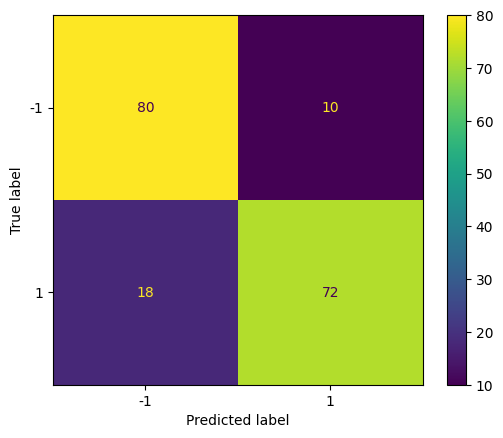

In [95]:
confusion_matrix_moons = metrics.confusion_matrix(ymoons_test, best_preds_moons)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_moons, display_labels = [-1, 1])
cm_display.plot()
plt.show()

### ROC AUC

ROC AUC:  0.8637654320987656


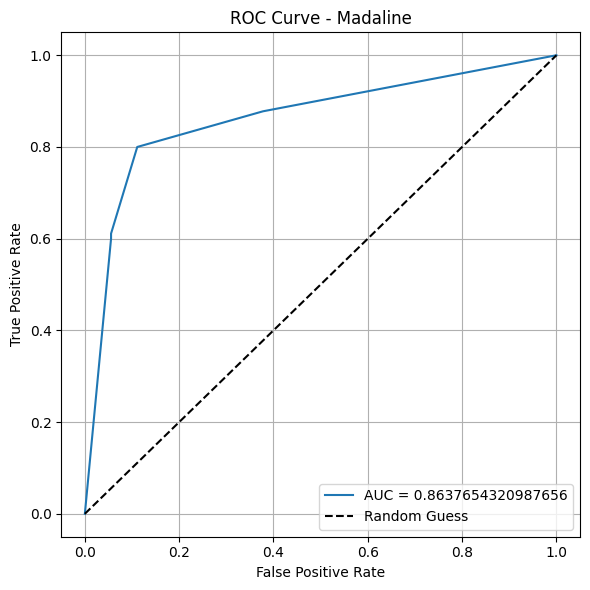

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(ymoons_test, best_scores_moons)
auc_moons = metrics.roc_auc_score(ymoons_test, best_scores_moons)

print(f"ROC AUC: ", auc_moons)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_moons}")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - Madaline (Moons)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

###  Decision Boundary

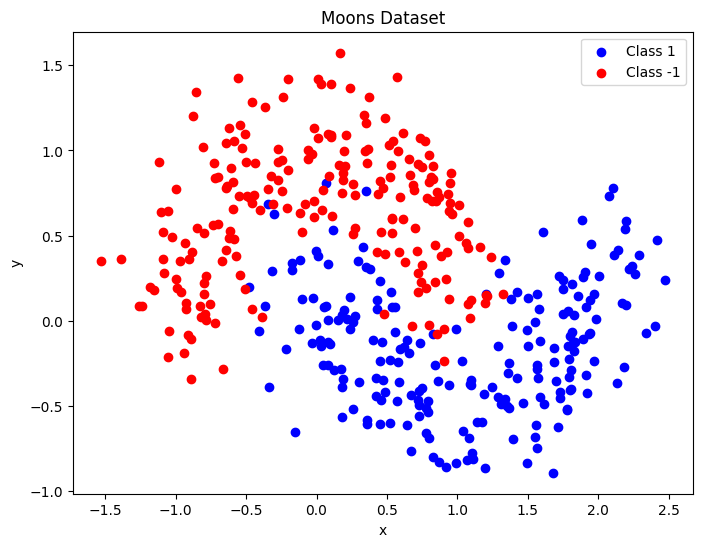

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Xmoons_train[ymoons_train == 1][:, 0], Xmoons_train[ymoons_train == 1][:, 1], color='b', label='Class 1')
plt.scatter(Xmoons_train[ymoons_train == -1][:, 0], Xmoons_train[ymoons_train == -1][:, 1], color='r', label='Class -1')
plt.title('Moons Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


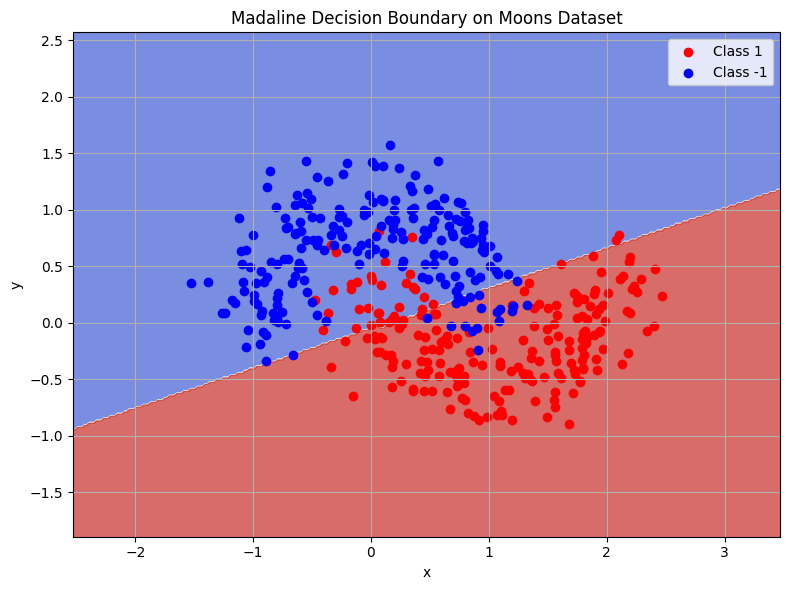

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot decision boundary
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    # Generate a grid of points to evaluate the decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Flatten the grid to pass to the model for predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Get predictions from the model (this assumes the model's predict method outputs -1 or 1)
    preds, _ = model.predict(grid_points)
    
    # Convert the list to a numpy array if needed
    preds = np.array(preds)
    
    # Reshape the predictions to match the shape of the grid
    preds = preds.reshape(xx.shape)

    # Plot the decision boundary (the contour)
    plt.contourf(xx, yy, preds, alpha=0.75, cmap=plt.cm.coolwarm)

    # Plot the actual data points
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label="Class 1")
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label="Class -1")

    # Add labels and title
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

# Assuming the best model has been selected from your models
best_model = Madaline_models[best_idx]  # If best_idx is already determined

# Plot decision boundary for the best Madaline model on the moons dataset
plt.figure(figsize=(8, 6))
plot_decision_boundary(Xmoons_train, ymoons_train, best_model, title="Madaline Decision Boundary on Moons Dataset")
plt.show()


### Training accuracy and Error

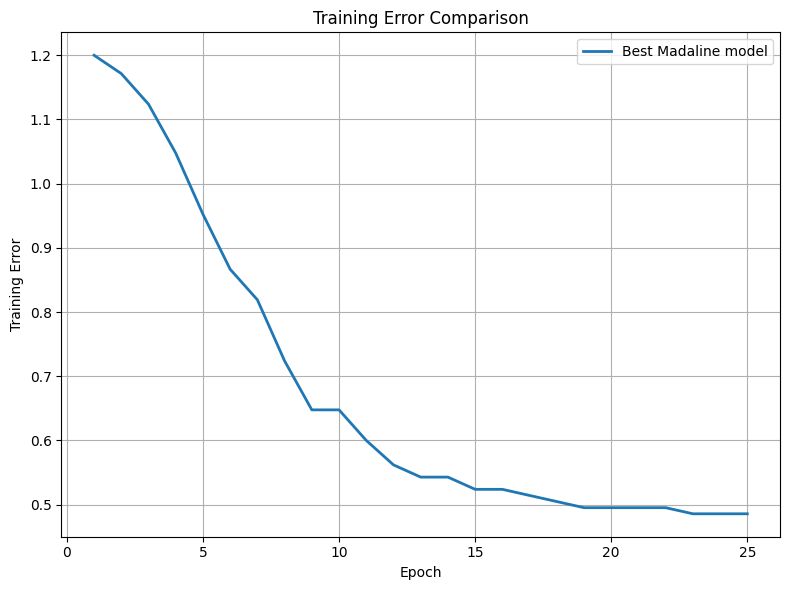

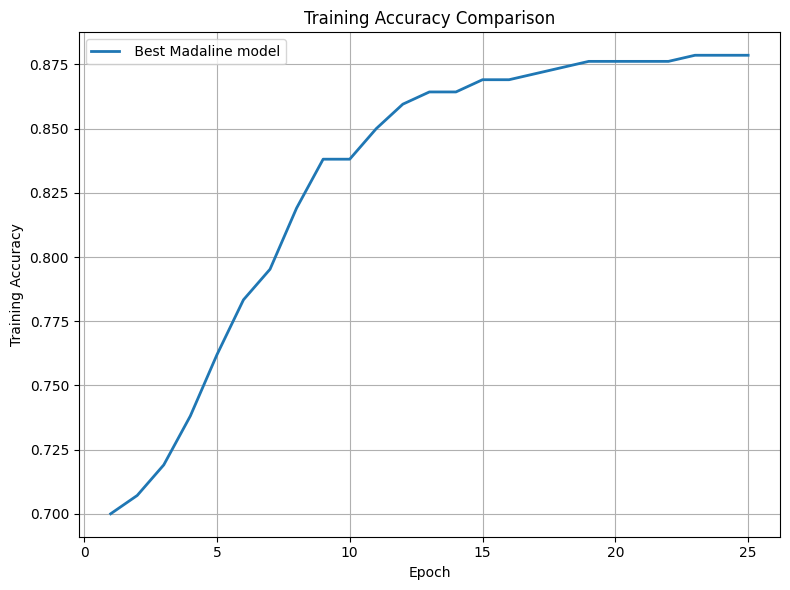

In [ ]:


epochs = range(1, len(mse_histories[1]) + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, mse_histories[best_idx], label='Best Madaline model (Moons)', linewidth=2)
plt.title('Training Error Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

epochs = range(1, len(acc_histories[best_idx]) + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, acc_histories[best_idx], label=' Best Madaline model (Moons)', linewidth=2)
plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Circles

# Create Table and summarize results for moons and circles over seeds 0,1,2